# Introduction to Machine Learning (CSCI-UA.473)

## Lab 1: Decision Trees and Random Forests
### Date: November 11th, 2021


### Name: (your name goes here)
### Email: (your NYU email goes here)

DecisionTreeClassifier(criterion='entropy')

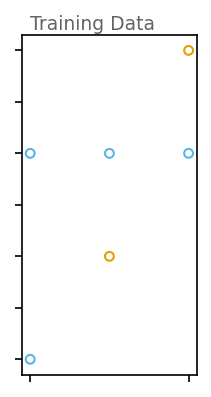

In [1]:
# Lets first create a basic decision tree for a very basic dataset!
from sklearn import tree, metrics
import numpy as np
import matplotlib.pyplot as plt
BLUE, ORANGE, GRAY = '#57B5E8', '#E69E00', '#646369'

#Our training data X is composed of two features, and our predictions are binary (0 or 1)
X = np.array([[0, 0], [1, 1], [2,2], [2,3], [0,2], [1,2]])
Y = np.array([0, 1, 0, 1, 0, 0 ])

def plot_data(X, Y):
    fig, ax = plt.subplots(figsize=(3, 3), dpi=150)
    ax.set_aspect(1.3)
    ax.scatter(X[:, 0], X[:, 1], s=18, facecolors='none',
               edgecolors=np.array([BLUE, ORANGE])[Y])
    ax.tick_params(
        bottom=True, left=True, labelleft=False, labelbottom=False)
    ax.text(0, 3.2, 'Training Data', color=GRAY, fontsize=9)
    return fig, ax

_, _ = plot_data(X, Y)

# Default splitting is done using Gini impurity, we will use entropy for our exercise.
clf = tree.DecisionTreeClassifier(criterion="entropy") 
clf.fit(X,Y)




In [2]:
test_X = 3 + 2.5 * np.random.randn(50, 2)
clf.predict(test_X)

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1])

In [3]:
# We can also see the probability with which the classifier assigns each class for every sample
clf.predict_proba(test_X)

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [4]:
# The decision tree seems to be pretty confident on all of its predictions. Any ideas how we can confuse it?
# HINT : Here probabilty can be thought of as the number of samples in the leaf node with the same class

In [5]:
# This was just a programmatic dataset, lets try the decision tree on a more meaningful one
from sklearn.datasets import load_digits
import graphviz

# We use the digits dataset provided by sklearn, this is similar to MNIST but much coarser (8x8) and 
# thus a lot lighter than MNIST (28x28)
dataset = load_digits()
X, Y = dataset.data, dataset.target
idxs = np.arange(0, len(X))
np.random.shuffle(idxs)
train_idxs,test_idxs = idxs[:1500], idxs[1500:]
train_X, train_Y = X[train_idxs], Y[train_idxs]
test_X, test_Y = X[test_idxs], Y[test_idxs]
plt.gray()
plt.matshow(dataset.images[1000])
print(dataset.target[1000])



ModuleNotFoundError: No module named 'graphviz'

In [ ]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(train_X, train_Y)
dot_data = tree.export_graphviz(clf, out_file='graph.dot', 
                      feature_names=dataset.feature_names,  
                      class_names=str(dataset.target_names),  
                      filled=True, rounded=True,  
                      special_characters=True) 
graph = graphviz.Source(dot_data)
!dot -Tpng graph.dot -o graph.png

In [ ]:
# Predict using the fitted decision tree
preds = clf.predict(test_X)

In [ ]:
print(np.sum(preds == test_Y)/len(preds))

In [ ]:
# This was your vanilla Decision trees, now lets look at Bagging.
from sklearn.ensemble import BaggingClassifier

# Remember, Bagging is just using an ensemble of decision trees to add more variance to your model.
# So we simply wrap our original DecisionTreeClassifier with a BaggingClassifier module.
clf = BaggingClassifier(base_estimator=tree.DecisionTreeClassifier(criterion='entropy'),
                       n_estimators=1, max_samples=1.0, max_features=1.0, bootstrap=True)
clf = clf.fit(train_X, train_Y)
# What would setting n_estimators as 1 mean?
# Changing the value for n_estimators changes our accuracy


In [ ]:
preds = clf.predict(test_X)

In [ ]:
print(np.sum(preds == test_Y)/len(preds))

In [ ]:
# Random forests
from sklearn.ensemble import RandomForestClassifier

# Now we try RandomForests on the same data. Again, RandomForests is just a method to ensemble your base models
# and will be used in the same way bagging was.
clf = RandomForestClassifier(n_estimators=5)
clf.fit(train_X, train_Y)


In [ ]:
preds = clf.predict(test_X)

In [ ]:
print(np.sum(preds == test_Y)/len(preds))

In [ ]:
# Next we implement gradient boosting, in particular the Adaboost algorithm.
# Remember, gradient boosting algorithms involve iteratively improving the decision trees
# and hence involve a learning rate similar to logistic regressions.
import matplotlib.pyplot as plt

from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_gaussian_quantiles

# Construct dataset
X1, y1 = make_gaussian_quantiles(
    cov=2.0, n_samples=200, n_features=2, n_classes=2, random_state=1
)
X2, y2 = make_gaussian_quantiles(
    mean=(3, 3), cov=1.5, n_samples=300, n_features=2, n_classes=2, random_state=1
)
X = np.concatenate((X1, X2))
y = np.concatenate((y1, -y2 + 1))


In [ ]:
# Plot the training points
plot_colors = "br"
plot_step = 0.02
class_names = "AB"
for i, n, c in zip(range(2), class_names, plot_colors):
    idx = np.where(y == i)
    plt.scatter(
        X[idx, 0],
        X[idx, 1],
        c=c,
        cmap=plt.cm.Paired,
        s=20,
        edgecolor="k",
        label="Class %s" % n,
    )

In [ ]:
# Create and fit an AdaBoosted decision tree
bdt = AdaBoostClassifier(
    tree.DecisionTreeClassifier(max_depth=1, criterion='entropy'),algorithm="SAMME", n_estimators=20, learning_rate=0.01
)
bdt.fit(X, y)


In [ ]:
# Plot the decision boundaries
plt.subplot(111)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
)

Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("tight")

# Plot the training points
for i, n, c in zip(range(2), class_names, plot_colors):
    idx = np.where(y == i)
    plt.scatter(
        X[idx, 0],
        X[idx, 1],
        c=c,
        cmap=plt.cm.Paired,
        s=20,
        edgecolor="k",
        label="Class %s" % n,
    )
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc="upper right")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Decision Boundary")


In [ ]:
# Plot the two-class decision scores
twoclass_output = bdt.decision_function(X)
plot_range = (twoclass_output.min(), twoclass_output.max())
plt.subplot(122)
for i, n, c in zip(range(2), class_names, plot_colors):
    plt.hist(
        twoclass_output[y == i],
        bins=10,
        range=plot_range,
        facecolor=c,
        label="Class %s" % n,
        alpha=0.5,
        edgecolor="k",
    )
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, y1, y2 * 1.2))
plt.legend(loc="upper right")
plt.ylabel("Samples")
plt.xlabel("Score")
plt.title("Decision Scores")

plt.tight_layout()
plt.subplots_adjust(wspace=0.35)
plt.show()
